In [7]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [8]:
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/mywavewam800n/MyWave_wam800_c1SPC00.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 446MB
Dimensions:                  (direction: 36, freq: 36, x: 1171, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 5kB 1 2 3 4 5 ... 1168 1169 1170 1171
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2024-12-16T18:00:00 ....
    latitude                 (y, x) float32 5kB ...
    longitude                (y, x) float32 5kB ...
Data variables:
    forecast_reference_time  datetime64[ns] 8B ...
    SPEC                     (time, y, x, freq, direction) float32 443MB ...
    Pdir                     (time, y, x) float32 342kB ...
    dd                       (time, y, x) float32 342kB ...
    depth                    (y, x) float32 5kB ...
    ff                       (time, y, x) float32 342kB ...
    hs                       (time, y, x) float32 342kB ...
    thq_sea                  (time, y, x) float32 342kB ...
    thq_swell                (time, y, x) float32 342kB ...
    tp                       (time, y, x) float32 342kB ...
Attributes:
    title:                           MyWaveWam 800m NordNorge
    institution:                     Norwegian Meteorological Institute
    source:                          WAM wave model version cycle 4.7.0
    direction_convention:            A direction of 0 degrees means a wave pr...
    history:                         Tue Dec 17 04:31:32 2024: ncks -A -v for...
    history_of_appended_files:       Tue Dec 17 04:31:32 2024: Appended file ...
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [5]:
ds.latitude

<xarray.DataArray 'latitude' (y: 1, x: 1171)> Size: 5kB
[1171 values with dtype=float32]
Coordinates:
  * x          (x) int32 5kB 1 2 3 4 5 6 7 ... 1166 1167 1168 1169 1170 1171
  * y          (y) int32 4B 1
    latitude   (y, x) float32 5kB ...
    longitude  (y, x) float32 5kB ...
Attributes:
    long_name:      latitude
    standard_name:  latitude
    units:          degree_north

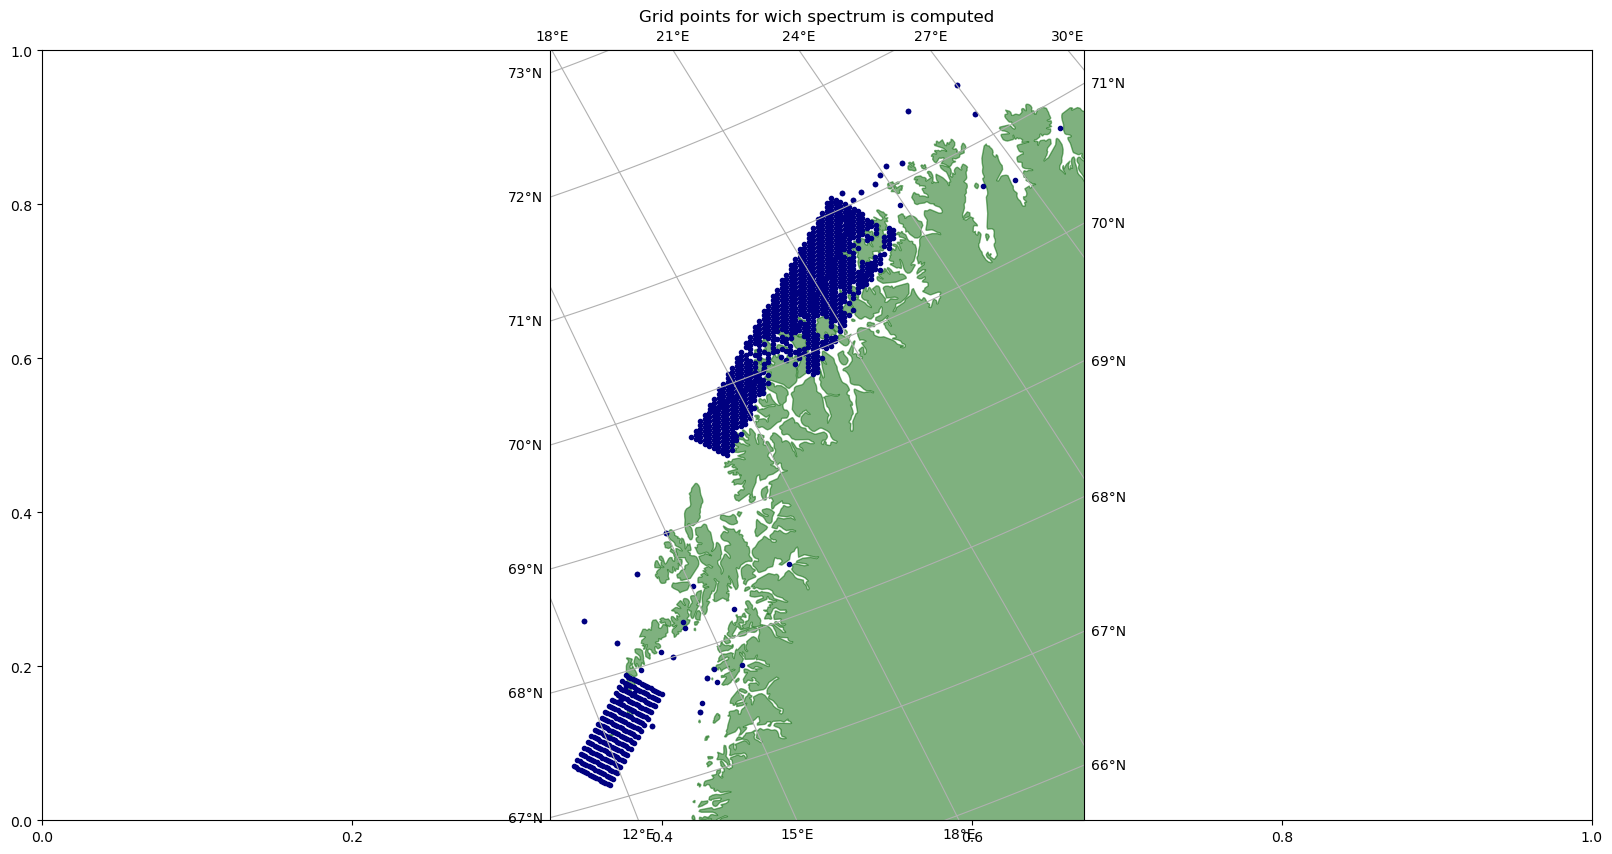

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.set_title("Grid points for wich spectrum is computed")
ax.scatter(ds.longitude,ds.latitude,marker='.', color='navy', transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)